<a href="https://colab.research.google.com/github/Allzer/VK/blob/main/VK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
# Объявление библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import learning_curve
import sklearn.metrics as metrics

import xgboost as xgb

# Загрузка тренеровочных данных
f_train = pd.read_csv('trainee_train.csv', encoding="latin-1", sep=';')

# Переносим тренировочную выборку в массивы numpy
y_train = f_train['im'][:]
y_data = np.array(y_train)

x_train = f_train.iloc[:, 2:].copy()
x_data = np.array(x_train)

# Т.к в тестовых данных не было y_test я воспользовался функцией train_test_split для разделения большого тренировочного датасета
# на тренировочную и тестовую выборку
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                     test_size=0.3,
                                                     random_state=42)

# Обучение модели градиентного бустинга точность 92% -> 93% (За счёт увеличения кол-ва деревьев)
model = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.07,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.5,
    objective='binary:logistic',
    random_state=42
)
model.fit(x_train, y_train)

predictions = model.predict(x_test)

# Смотрим точность
accuracy = np.mean(predictions == y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9351351351351351


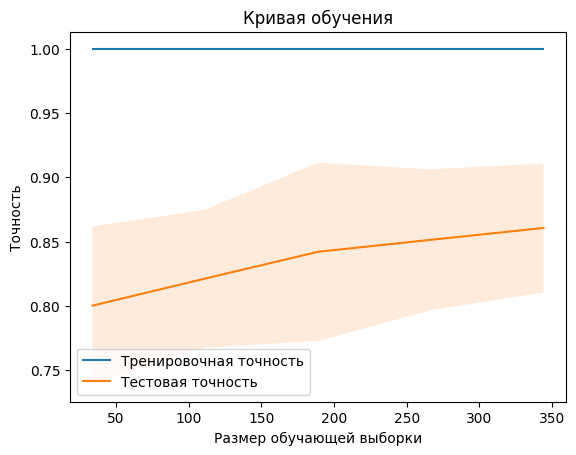

In [138]:
# Рисуем графики для наглядности
train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Тренировочная точность')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Тестовая точность')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.xlabel('Размер обучающей выборки')
plt.ylabel('Точность')
plt.title('Кривая обучения')
plt.legend()
plt.show()

In [131]:
# Создаём таблицу
df_predictions = pd.DataFrame({'im': range(len(predictions)), 'predictions': predictions})
df_predictions.to_excel('predictions.xlsx', index=False)

print(df_predictions)

      im  predictions
0      0            1
1      1            0
2      2            1
3      3            1
4      4            0
..   ...          ...
180  180            0
181  181            1
182  182            0
183  183            1
184  184            1

[185 rows x 2 columns]
